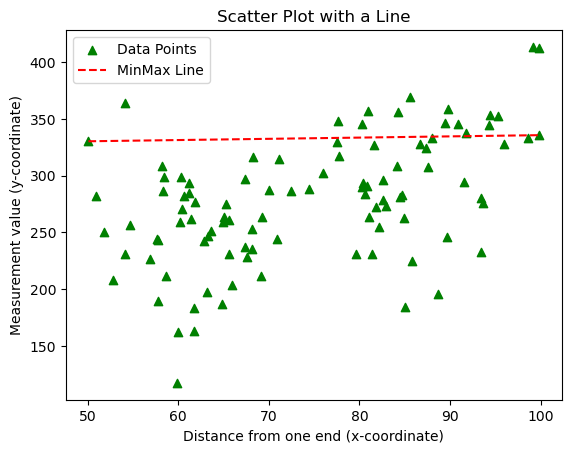

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
dataA = pd.read_csv('scatter_data.csv')

plt.scatter(dataA['% x'], dataA[' y '], color='green', marker='^', label='Data Points')

sorted_dataA = dataA.sort_values(by='% x')
plt.plot([sorted_dataA['% x'].iloc[0], sorted_dataA['% x'].iloc[-1]],
         [sorted_dataA[' y '].iloc[0], sorted_dataA[' y '].iloc[-1]],
         color='red', linestyle='--', label='MinMax Line')

plt.title('Scatter Plot with a Line')

plt.xlabel('Distance from one end (x-coordinate)')
plt.ylabel('Measurement value (y-coordinate)')

plt.legend()
plt.show()


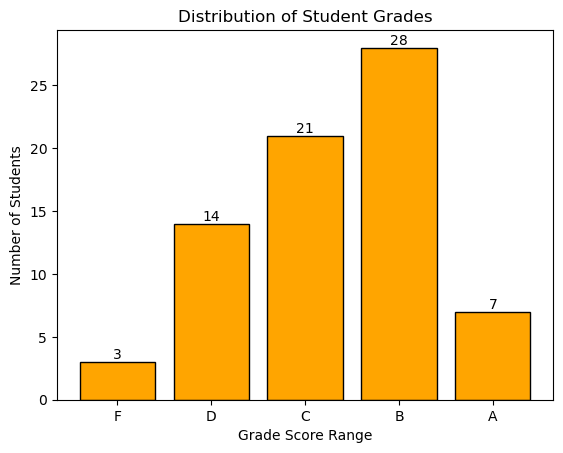

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
dataB = pd.read_csv('student_grades.csv')
dataB
dataB.columns = dataB.columns.str.strip()
score = [(0, 60), (60, 70), (70, 80), (80, 90), (90, 100)] 
label = ['F', 'D', 'C', 'B', 'A']
dataB['grade_category'] = pd.cut(dataB['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = dataB['grade_category'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.xlabel('Grade Score Range')
plt.ylabel('Number of Students')
plt.title('Distribution of Student Grades')

plt.show()


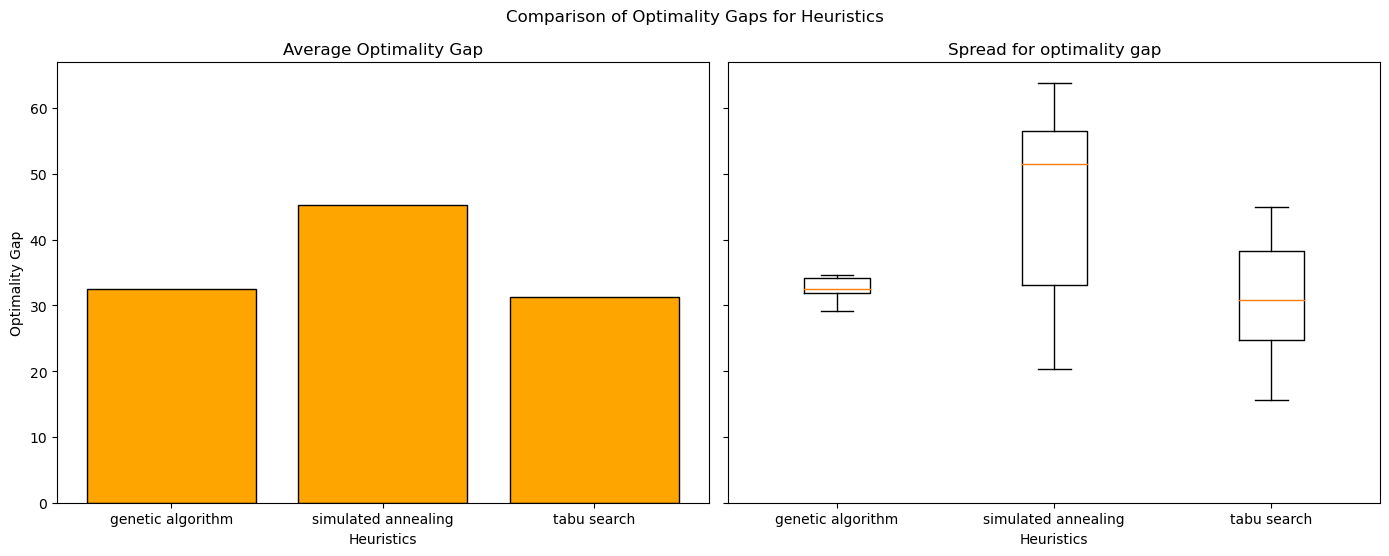

In [9]:
dataC = pd.read_csv("solution_data.csv")
dataC.columns = dataC.columns.str.strip()
optimal = dataC[dataC["SolnMethod"] == "optimal"]
mergedata = dataC.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
mergedata['optimality_gap'] = ((mergedata['Valueoptimal'] - mergedata['Value'])/mergedata['Valueoptimal'])*100
heuristic = mergedata[mergedata['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

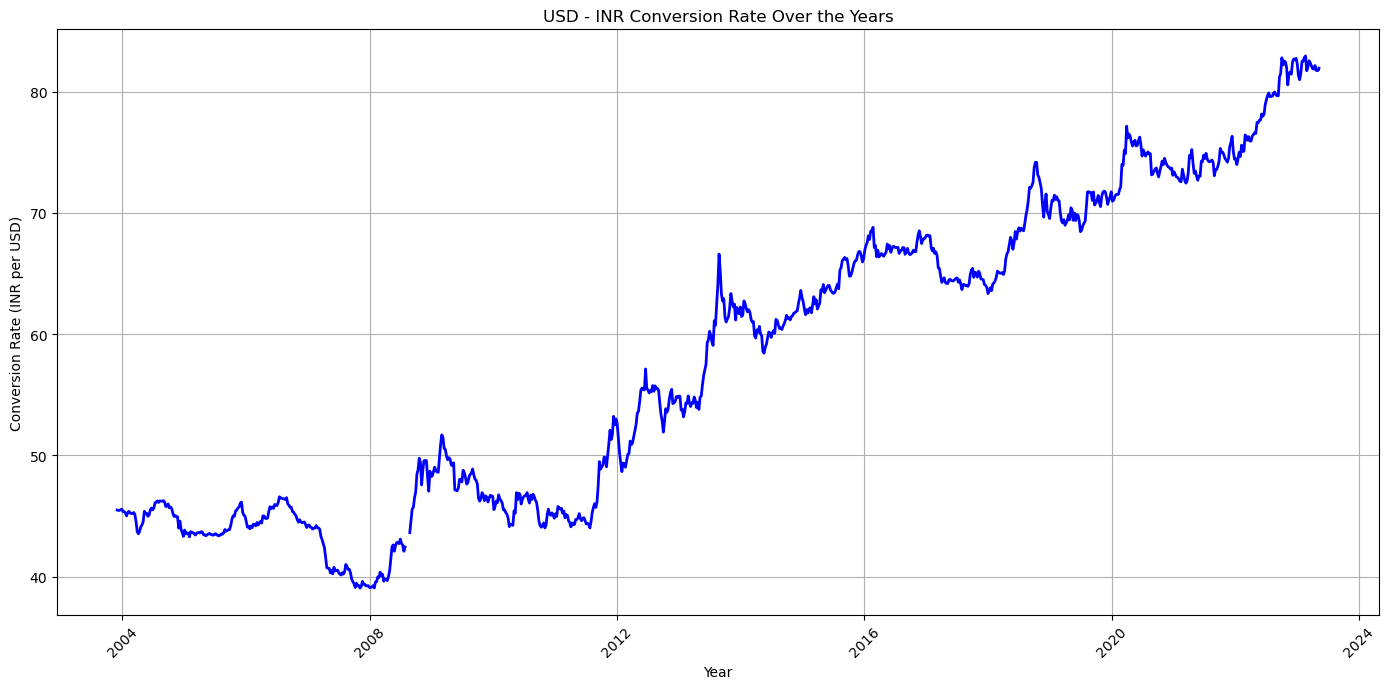

In [10]:
#link of dataset
#https://www.kaggle.com/datasets/bhanupratapbiswas/usd-inr-conversion-rate-case-study
#link of graph
#https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py
import pandas as pd
import matplotlib.pyplot as plt

dataD = pd.read_csv("INR-USD.csv")


dataD['Date'] = pd.to_datetime(dataD['Date'])

plt.figure(figsize=(14, 7))
plt.plot(dataD['Date'], dataD['Close'], color='blue', linewidth=2)
plt.title('USD - INR Conversion Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Conversion Rate (INR per USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()